In [1]:
import pandas as pd
from collections import Counter
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
import tensorflow as tf

# One id

In [2]:
#charging datasets
jpred_oneid_df=pd.read_csv('./pdb/jpred/jpred_oneid.tsv', sep='\t', names=['pdb_id','sequence','secondary_structure', 'len'])
phyre_oneid=pd.read_csv('./pdb/phyre/phyreoneid.tsv', sep='\t', names=['pdb_id','sequence','secondary_structure', 'len'])
pep2d_oneid=pd.read_csv('./pdb/pep2d/pep2d_one.csv')

In [3]:
jpred_oneid_df

,pdb_id,sequence,secondary_structure,len
0,1avf,AVVKVPLKKFKSIRETMKEKGLLGEF,CCEEEECCCCHHHHHHHHHHHHHHHC,26
1,1bh4,CGESCVWIPCISAALGCSCKNKVCYRNGIP,CCCCEEEEHHHHHHHCCCCCCCCCCCCCCC,30
2,1bk8,LCNERPSQTWSGNCGNTAHCDKQCQDWEKASHGACHKRENHWKCFC...,CCCCCCCCCEEEEECCCCCCCHHHHHHHCCCCCEEEECCCCCEEEE...,50
3,1bnb,APLSCGRNGGVCIPIRCPVPMRQIGTCFGRPVKCCRSW,CCCCCCCCCCEEEEEECCCCCHHHHHCCCCCCCCCCCC,38
4,1cix,YSRCQLQGFNCVVRSYGLPTIPCCRGLTCRSYFPGSTYGRCQRY,CCCCEECCCCEEECCCCCCCCCCCCCCCCCCCCCCCCCCEECCC,44
...,...,...,...,...
256,7c2p,RTCESQSHKFKGPCLRASNCANVCKTEGFHGGKCRGFRRRCFCTKHC,CCCCCCCCCEEEEEECCCCCHHHHCCCCCCCCEEECCCCCEECCCCC,47
257,7c31,RVCESQSHKFEGACMGDHNCALVCRNEGFSGGKCKGLRRRCFCTKLC,CCCCCCCCCCEEEEECCCCCHHHHCCCCCCCCEEECCCCEEEECCCC,47
258,7k7x,GLPVCGETCVGGTCNTPGCVCSWPVCTRN,CCCCCCCCEECCCCCCCCCEEEEEEECCC,29
259,7kpd,AIPCGESCVYIPCISVVIGCSCRNKVCYR,CCCCCCCEEEEEEHHHHHCCCCCCCECCC,29


In [4]:
def ss_percentage(df, column):
    '''This function calculates ss percentage (C,H,E) from string
        DataFrame must contain a column named 'len' with the length of all sequences
        param: df=dataframe containing ss calculations
        param: column= column corresponding to ss
        return: none (dataframe updated with ss%) 
    '''
    ss_list=df[column].tolist()
    helix_count=[]
    coil_count=[]
    strand_count=[]
    
    for i in range(len(ss_list)):
        coil_count.append(ss_list[i].count('C'))
        helix_count.append(ss_list[i].count('H'))
        strand_count.append(ss_list[i].count('E'))
    
    helix_percent=[]
    coil_percent=[]
    strand_percent=[]
    len_df=df['len'].tolist()
    
    for j in range(len(coil_count)):
        coil_percent.append(round(coil_count[j]/len_df[j]*100, 3))
        helix_percent.append(round(helix_count[j]/len_df[j]*100, 3))
        strand_percent.append(round(strand_count[j]/len_df[j]*100, 3))
    
    df['helix%']=helix_percent
    df['strand%']=strand_percent
    df['coil%']=coil_percent
    
    return None


In [5]:
#calculating percentage
ss_percentage(df=jpred_oneid_df, column='secondary_structure')
ss_percentage(df=phyre_oneid, column='secondary_structure')

In [9]:
#saving DF with calculated percentages
phyre_oneid.to_csv('./pdb/phyre/oneid_prc.csv')
jpred_oneid_df.to_csv('./pdb/jpred/oneid_prc.csv')

In [7]:
phyre_oneid_df=pd.read_csv('./pdb/phyre/oneid_prc.csv', index_col=0)
jpred_oneid_df=pd.read_csv('./pdb/jpred/oneid_prc.csv', index_col=0)

# KL Divergence & Shannon Entropy

In [10]:
def kl_divergence(p, q):
 return np.sum(np.where(p != 0, p * np.log(p / q), 0))

# Graphs 

In [21]:
pdb_pep2d=pd.read_csv('./pdb/benchmark/pdb_pep2d.csv')
pdb_jpred=pd.read_csv('./pdb/benchmark/pdb_jpred.csv')
pdb_phyre=pd.read_csv('./pdb/benchmark/pdb_phyre.csv')

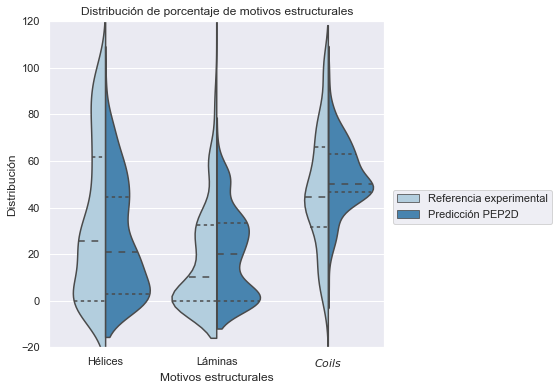

In [19]:
fig=plt.gcf()
fig.set_size_inches(6,6)
g=sns.violinplot(data=pdb_pep2d, y="percentage", x='motif', hue='type', split=True, inner='quartile', palette='Blues')
g.set(ylim=(-20,120))
plt.title('Distribución de porcentaje de motivos estructurales')
plt.xlabel('Motivos estructurales')
plt.ylabel('Distribución')
sns.set_theme(style="darkgrid")
g.legend(handles=g.legend_.legendHandles, labels=['Referencia experimental', 'Predicción PEP2D'], bbox_to_anchor=(1.01, 0.5))
g.set_xticklabels(['Hélices', 'Láminas', "$\it{Coils}$"])
plt.show()

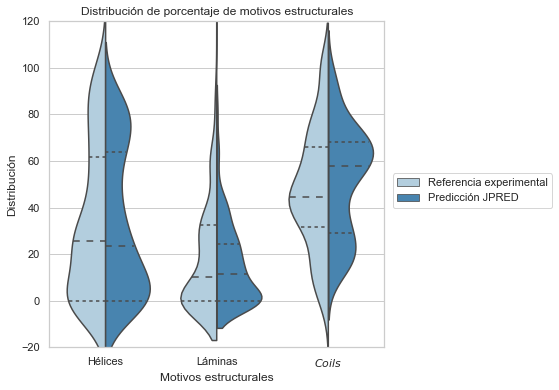

In [22]:
fig=plt.gcf()
fig.set_size_inches(6,6)
g=sns.violinplot(data=pdb_jpred, y="percentage", x='motif', hue='type', split=True, inner='quart', palette='Blues', bw='silverman')
g.set(ylim=(-20,120))
plt.title('Distribución de porcentaje de motivos estructurales')
plt.xlabel('Motivos estructurales')
plt.ylabel('Distribución')
sns.set_theme(style="whitegrid")
g.legend(handles=g.legend_.legendHandles, labels=['Referencia experimental', 'Predicción JPRED'], bbox_to_anchor=(1.01, 0.55))
g.set_xticklabels(['Hélices', 'Láminas', "$\it{Coils}$"])
plt.show()

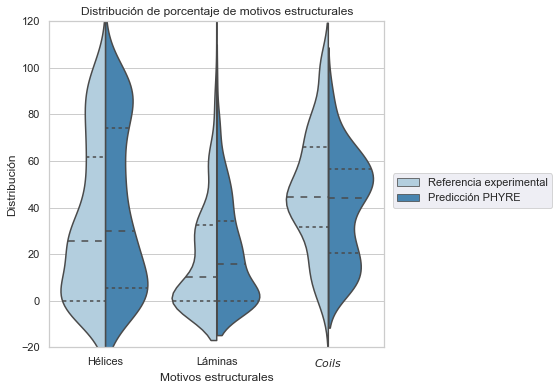

In [17]:
fig=plt.gcf()
fig.set_size_inches(6,6)
g=sns.violinplot(data=pdb_phyre, y="percentage", x='motif', hue='type', split=True, inner='quart', palette='Blues', bw='silverman')
g.set(ylim=(-20,120))
plt.title('Distribución de porcentaje de motivos estructurales')
plt.xlabel('Motivos estructurales')
plt.ylabel('Distribución')
sns.set_theme(style="darkgrid")
g.legend(handles=g.legend_.legendHandles, labels=['Referencia experimental', 'Predicción PHYRE'], bbox_to_anchor=(1.01, 0.55))
g.set_xticklabels(['Hélices', 'Láminas', "$\it{Coils}$"])
plt.show()